In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV de vuelos
df_vuelos = pd.read_csv('C:/Users/crist/OneDrive/Documentos/Septimo Cuatrimestre/Examen Primer Parcial/flights.csv')
df_vuelos.head()

# Mostrar el dataframe de vuelos
print(df_vuelos)

        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0       2013      9          16          1      DL            15304   
1       2013      9          23          1      WN            14122   
2       2013      9           7          6      AS            14747   
3       2013      7          22          1      OO            13930   
4       2013      5          16          4      DL            13931   
...      ...    ...         ...        ...     ...              ...   
271935  2013      9          20          5      VX            13204   
271936  2013      4          19          5      FL            10397   
271937  2013     10          26          6      WN            12191   
271938  2013      5           7          2      HA            13830   
271939  2013      6          11          2      UA            14771   

                               OriginAirportName     OriginCity OriginState  \
0                            Tampa International          Tampa     

In [2]:
# Verificación de valores faltantes en el conjunto de datos
valores_faltantes = df_vuelos.isnull().sum()

# Imputación de valores faltantes en 'DepDel15' en función de 'DepDelay'
df_vuelos['DepDel15'] = df_vuelos['DepDelay'].apply(lambda x: 1 if x >= 15 else 0)

# Comprobación de valores atípicos en DepDelay y ArrDelay usando estadísticas descriptivas
estadisticas_retrasos = df_vuelos[['DepDelay', 'ArrDelay']].describe()

# Filtrar filas donde DepDelay o ArrDelay sea mayor a 600 minutos (valores atípicos)
df_limpio = df_vuelos[(df_vuelos['DepDelay'] <= 600) & (df_vuelos['ArrDelay'] <= 600)]

# Verificar las nuevas estadísticas después de eliminar valores atípicos
estadisticas_retrasos_limpios = df_limpio[['DepDelay', 'ArrDelay']].describe()

# Agrupar por aerolínea para comparar el rendimiento en retraso de llegada
retraso_llegada_aerolinea = df_limpio.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)

# Agrupar por día de la semana para ver si hay diferencias en los retrasos de llegada
retraso_llegada_dia_semana = df_limpio.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()

# Agrupar por aeropuerto de origen para encontrar el aeropuerto con mayor retraso promedio de salida
retraso_salida_aeropuerto = df_limpio.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False).head(10)

Retraso de llegada por aerolínea:
 Carrier
MQ    12.605611
F9    11.460147
EV    10.074347
B6     9.841757
VX     9.453929
WN     8.062512
YV     7.758739
FL     7.611958
AA     6.719252
OO     6.006984
9E     5.100463
UA     4.847762
US     4.011702
DL     2.183680
HA     0.066098
AS    -0.129657
Name: ArrDelay, dtype: float64


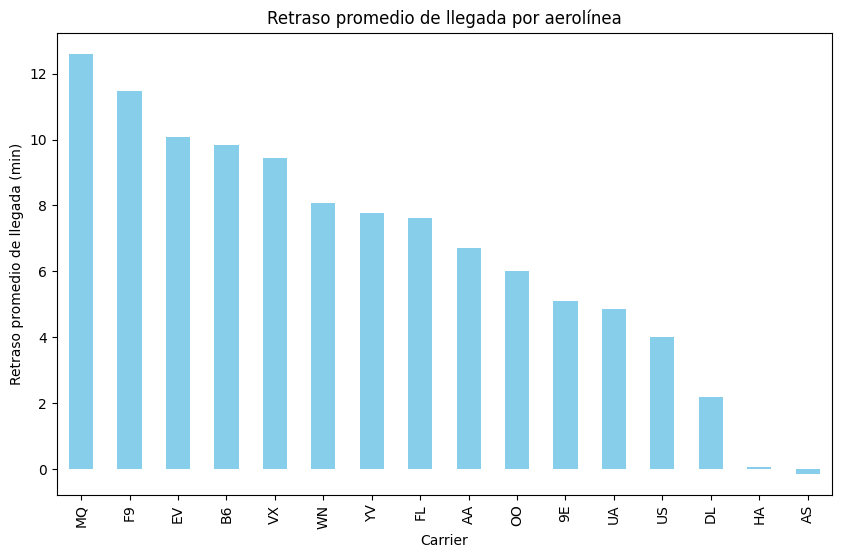

In [3]:
# 1. Gráfico de barras - Retraso promedio de llegada por aerolínea
print("Retraso de llegada por aerolínea:\n", retraso_llegada_aerolinea)
plt.figure(figsize=(10, 6))
retraso_llegada_aerolinea.plot(kind='bar', color='skyblue')
plt.title('Retraso promedio de llegada por aerolínea')
plt.ylabel('Retraso promedio de llegada (min)')
plt.xticks(rotation=90)
plt.show()

Retraso de llegada por día de la semana:
 DayOfWeek
6     2.028329
2     4.178987
7     4.905797
1     6.622064
3     6.846158
5     8.315198
4    10.565032
Name: ArrDelay, dtype: float64


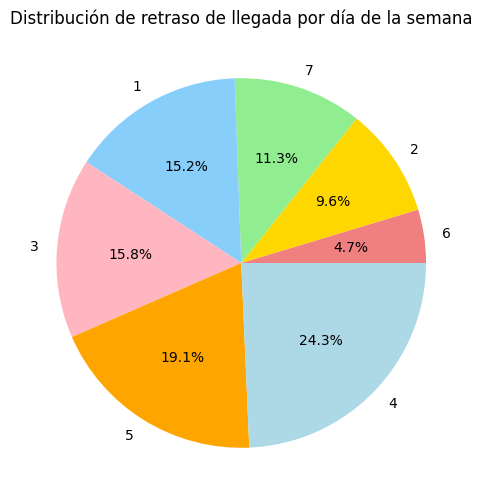

In [4]:
# 2. Gráfico circular - Retraso promedio de llegada por día de la semana
print("Retraso de llegada por día de la semana:\n", retraso_llegada_dia_semana)
plt.figure(figsize=(6, 6))
retraso_llegada_dia_semana.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'lightpink', 'orange', 'lightblue'])
plt.title('Distribución de retraso de llegada por día de la semana')
plt.ylabel('')
plt.show()

Gráfico de dispersión de DepDelay vs ArrDelay:


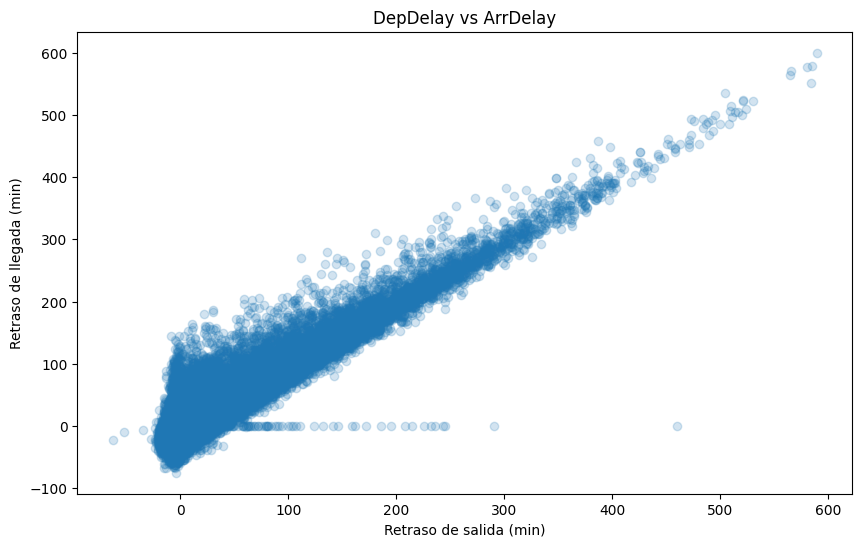

In [5]:
# 3. Gráfico de dispersión - DepDelay vs ArrDelay
print("Gráfico de dispersión de DepDelay vs ArrDelay:")
plt.figure(figsize=(10, 6))
plt.scatter(df_limpio['DepDelay'], df_limpio['ArrDelay'], alpha=0.2)
plt.title('DepDelay vs ArrDelay')
plt.xlabel('Retraso de salida (min)')
plt.ylabel('Retraso de llegada (min)')
plt.show()

Distribución de DepDelay:


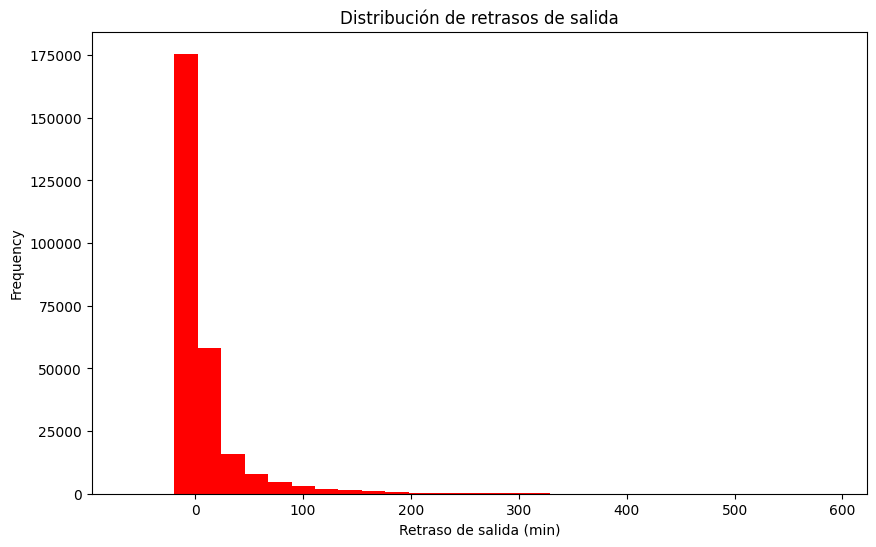

In [9]:
# 4. Histograma - Distribución de DepDelay
print("Distribución de DepDelay:")
plt.figure(figsize=(10, 6))
df_limpio['DepDelay'].plot(kind='hist', bins=30, color='red')
plt.title('Distribución de retrasos de salida')
plt.xlabel('Retraso de salida (min)')
plt.show()

Gráfico de líneas - Retraso promedio de llegada por día de la semana:


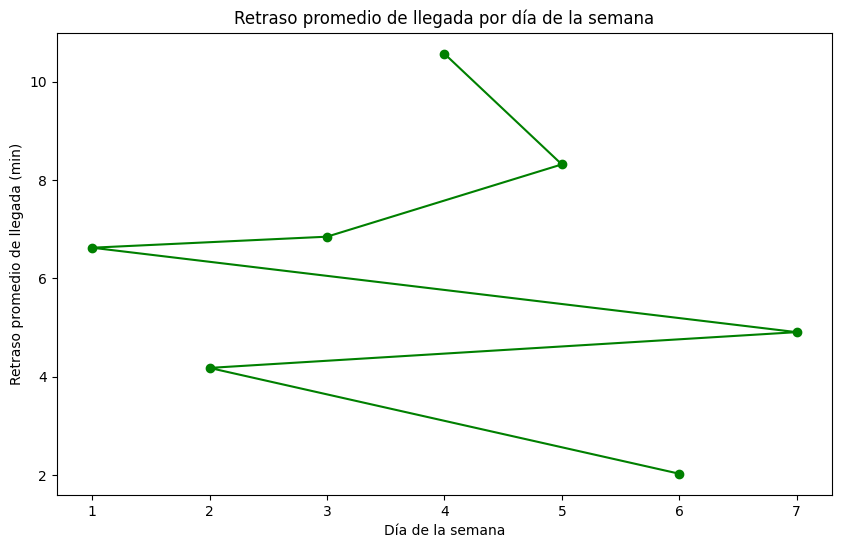

In [7]:
# 5. Gráfico de líneas - Retraso de llegada por día de la semana
print("Gráfico de líneas - Retraso promedio de llegada por día de la semana:")
plt.figure(figsize=(10, 6))
retraso_llegada_dia_semana.plot(kind='line', marker='o', color='green')
plt.title('Retraso promedio de llegada por día de la semana')
plt.ylabel('Retraso promedio de llegada (min)')
plt.xlabel('Día de la semana')
plt.show()

Diagrama de cajas - Retraso de salida por aerolínea:


<Figure size 1000x600 with 0 Axes>

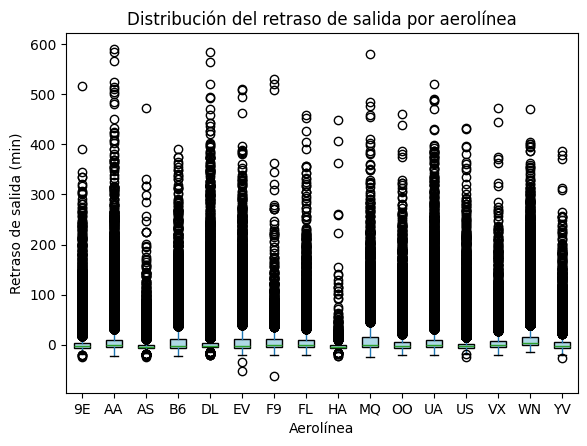

In [8]:
# 6. Diagrama de cajas - DepDelay por aerolínea
print("Diagrama de cajas - Retraso de salida por aerolínea:")
plt.figure(figsize=(10, 6))
df_limpio.boxplot(column='DepDelay', by='Carrier', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución del retraso de salida por aerolínea')
plt.suptitle('')  # Eliminar el título automático del diagrama de cajas
plt.xlabel('Aerolínea')
plt.ylabel('Retraso de salida (min)')
plt.show()